In [9]:
import pandas as pd
import requests
from dotenv import load_dotenv
from io import StringIO
import os
import matplotlib.pyplot as plt

load_dotenv()
API_KEY = os.getenv('DUNE_API_KEY')
QUERY_ID = 6111465
url = f"https://api.dune.com/api/v1/query/{QUERY_ID}/results/csv?limit=4000"

headers = {"X-Dune-API-Key": API_KEY}
response = requests.get(url, headers=headers)

df = pd.read_csv(StringIO(response.text))
df.head()


,day,avg_price,event
0,2025-11-01 00:00:00.000 UTC,3871.217977,<nil>
1,2025-10-31 00:00:00.000 UTC,3848.087500,<nil>
2,2025-10-30 00:00:00.000 UTC,3845.239375,<nil>
3,2025-10-29 00:00:00.000 UTC,3985.888715,<nil>
4,2025-10-28 00:00:00.000 UTC,4095.139792,<nil>


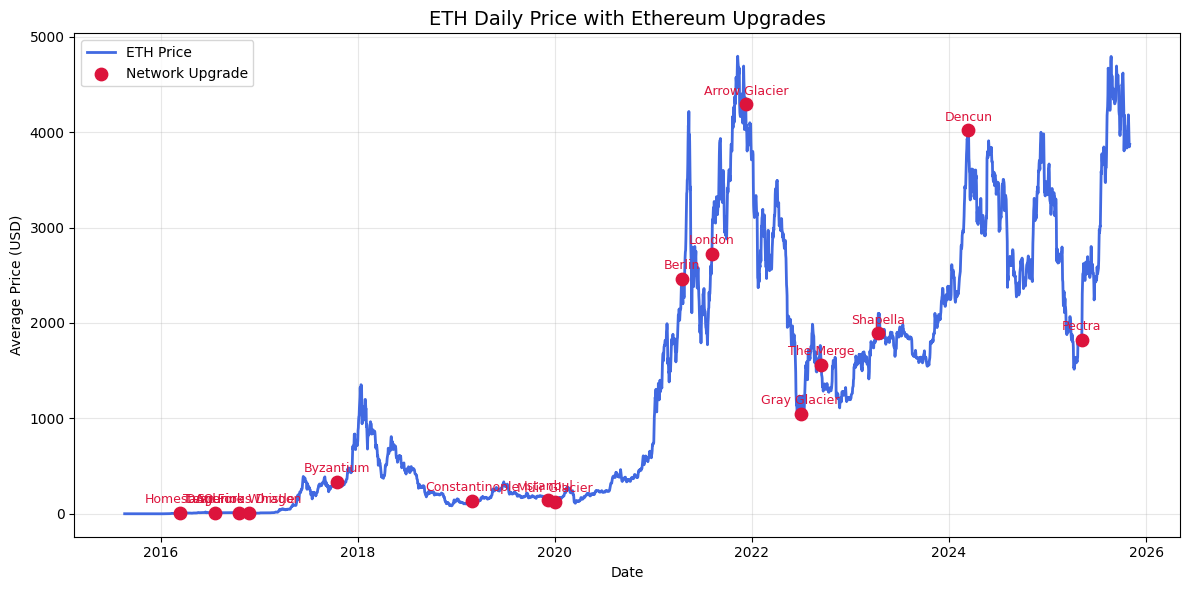

In [10]:
df['day'] = pd.to_datetime(df['day'])
upgrades = df[df['event'].notna() & (df['event'] != '<nil>')]
plt.figure(figsize=(12,6))
plt.plot(df['day'], df['avg_price'], label='ETH Price', color='royalblue', linewidth=2)
plt.scatter(upgrades['day'], upgrades['avg_price'], color='crimson', s=80, label='Network Upgrade', zorder=5)
for _, row in upgrades.iterrows():
    plt.text(row['day'], row['avg_price'] + 100, row['event'],
             color='crimson', fontsize=9, ha='center')
plt.title("ETH Daily Price with Ethereum Upgrades", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Average Price (USD)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [11]:
url = "https://fred.stlouisfed.org/graph/fredgraph.csv?id=EFFR"
fed_rate = pd.read_csv(url)
fed_rate.columns = ['day', 'fed_rate_pct']
fed_rate.head()

,day,fed_rate_pct
0,2000-07-03,7.03
1,2000-07-04,NaN
2,2000-07-05,6.52
3,2000-07-06,6.51
4,2000-07-07,6.42


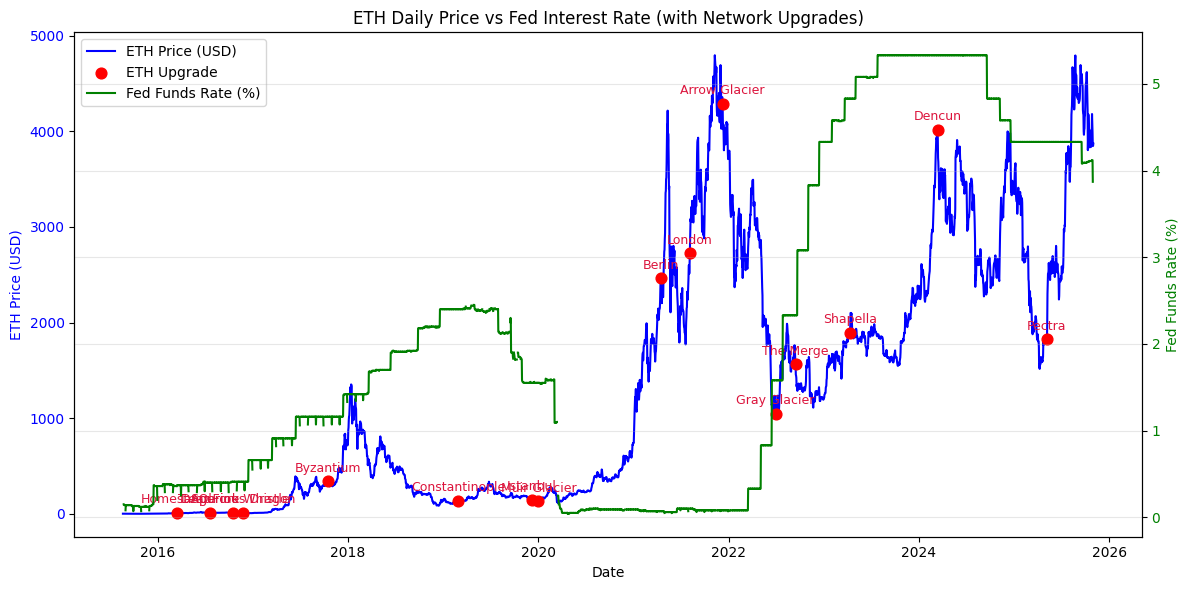

In [22]:
df['day'] = pd.to_datetime(df['day']).dt.tz_localize(None)
fed_rate['day'] = pd.to_datetime(fed_rate['day'])
df_merged = pd.merge(df, fed_rate, on='day', how='left')
df_merged.head()

fig, ax1 = plt.subplots(figsize=(12,6))

ax1.plot(df_merged['day'], df_merged['avg_price'], color='blue', label='ETH Price (USD)')
ax1.set_xlabel('Date')
ax1.set_ylabel('ETH Price (USD)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
upgrade_points = df_merged[df_merged['event'].notna() & (df_merged['event'] != '<nil>')]
ax1.scatter(upgrade_points['day'], upgrade_points['avg_price'],
            color='red', s=60, label='ETH Upgrade', zorder=5)
for _, row in upgrade_points.iterrows():
    plt.text(row['day'], row['avg_price'] + 100, row['event'],
             color='crimson', fontsize=9, ha='center')
ax2 = ax1.twinx()
ax2.plot(df_merged['day'], df_merged['fed_rate_pct'], color='green', label='Fed Funds Rate (%)')
ax2.set_ylabel('Fed Funds Rate (%)', color='green')
ax2.tick_params(axis='y', labelcolor='green')
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')
plt.title('ETH Daily Price vs Fed Interest Rate (with Network Upgrades)')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()